
<h1 style="text-align: center;">End-to-End Mammography Inference Workshop</h1>

<p>
  <b>Based on:</b> Shen et al., 
  <i>Scientific Reports</i> (2019) — 
  "Deep Learning to Improve Breast Cancer Detection on Screening Mammography".<br>
  <b>Code base:</b> 
  <a href="https://github.com/lishen/end2end-all-conv" target="_blank">
    lishen/end2end-all-conv
  </a>
</p>

<p>
  This notebook covers: environment setup, preprocessing, inference with pretrained models, 
  and evaluation. It also includes a short theoretical introduction to classifiers, 
  datasets, and architectures.
</p>

---

# Introduction

Breast cancer remains one of the leading causes of mortality among women worldwide, which has driven the development of **artificial intelligence–based diagnostic support tools**. In particular, **deep learning methods applied to mammography** have shown promising results in improving the sensitivity and specificity of computer-aided detection (CAD) systems.  

One of the most relevant contributions in this area was made by **Shen et al. (2019)**, who proposed an *end-to-end* training pipeline. Their approach combines patch-level classifiers with whole-image classifiers, significantly reducing the dependency on detailed region of interest (ROI) annotations. This strategy enables models to be trained with a combination of richly annotated datasets and larger collections labeled only at the image level.  

---

<div align="center">
<h3>END TO END ARCHITECTURE<h3>
</div>
<div align="center">
  <img src="Assets/end2end-architecture.png" alt="End-to-End Architecture" width="650"/>
  <img src="Assets/yaroslav-architecture.png" alt="Yaroslav Architecture" width="700"/>
</div>


---



After defining the model architecture, Shen et al. validated their method on two widely used public datasets:  

- **CBIS-DDSM**: a curated subset of the DDSM database, with 2,478 digitized mammograms and lesion-level annotations, used for the initial training of patch classifiers.  
- **INbreast**: a dataset with 410 full-field digital mammography (FFDM) images, mainly used to evaluate model transferability and generalization to higher-quality clinical images【Shen et al., 2019】.  

### Datasets Samples and URL to download it.

<div align="center" style="display: flex; justify-content: center; gap: 40px;">
  <figure style="text-align: center;">
    <img src="Assets/cbis-example.jpg" width="300" height="420"/>
    <figcaption>
      <a href="https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset" target="_blank">
        CBIS-DDSM Breast Cancer Image Dataset
      </a>
    </figcaption>
  </figure>
  
  <figure style="text-align: center;">
    <img src="Assets/inbreast-example.png" width="390" height="400"/>
    <figcaption>
      <a href="https://www.kaggle.com/datasets/ramanathansp20/inbreast-dataset" target="_blank">
        INBreast Dataset
      </a>
    </figcaption>
  </figure>
</div>

---

In this notebook, we document the process of **implementing, adapting, and evaluating these models using an alternative dataset**. Specifically, we use images acquired with **MicroDose SI (Philips Healthcare, The Netherlands)** and **Senographe Essential (GE Healthcare, USA)** systems, managed through **Optomed software (Finland)**. This dataset includes **1,528 images from 382 women**, each with the two standard views: **cranio-caudal (CC)** and **medio-lateral oblique (MLO)**. All images were standardized to a resolution of **100 µm/pixel** and stored in 16-bit format【Scientific Reports, 2023】.  

<div align="center" style="display: flex; justify-content: center; gap: 20px; align-items: flex-start;">
  <figure style="text-align: center; width: 350px; margin: 0;">
    <img src="Assets/controls-example.png" width="350" height="400"/>
    <figcaption><b>Controls</b></figcaption>
  </figure>

  <figure style="text-align: center; width: 350px; margin: 0;">
    <img src="Assets/cases-example.png" width="350" height="400"/>
    <figcaption><b>Cases</b></figcaption>
  </figure>
</div>

<div align="center" style="margin-top: 5px; color: red; font-weight: bold;">
  ⚠️ Please note: This dataset will be used for inference. Make sure to download it and place it in the root directory of the project. To get de dataset ask to the autors or find it the CPS DC channel  
</div>



The main objective is to **adapt and preprocess this dataset so that the predictions of the pre-trained models are consistent with the available clinical annotations**, while assessing network performance in a scenario different from the one originally proposed. This will help evaluate the **transferability and robustness of the models** for use with heterogeneous datasets, a key requirement for real-world clinical applications.  

---

**References:**  
- Shen L, Margolies LR, Rothstein JH, Fluder E, McBride R, Sieh W. *Deep Learning to Improve Breast Cancer Detection on Screening Mammography*. Scientific Reports. 2019; 9:12495. https://doi.org/10.1038/s41598-019-48995-4  
- Scientific Reports. *Automated breast cancer detection in digital mammograms using deep learning*. 2023. https://www.nature.com/articles/s41598-023-46921-3

---

## 1) Environment Setup

<h4>A) Install</h4>

<p>
  Before creating the working environment and installing the required libraries, 
  it is essential to install three fundamental programs on your system:
</p>
<ul>
  <li><b>Python 3.7.0:</b> the specific version of the language required to ensure compatibility with the libraries used.</li>
  <li><b>Anaconda:</b> simplifies the management of virtual environments and dependencies, making sure each project is isolated and well organized.</li>
  <li><b>ImageMagick:</b> an image processing tool necessary for the correct execution of some project functions. <strong>In windows it's necessary to install the .dll</strong> in Ubuntu just the library with pip.</li>
</ul>
<p>
  These programs must be installed in the order shown, as they form the foundation 
  on which the development environment will be configured and the required libraries 
  will later be installed.
</p>


<div align="center" style="display: flex; justify-content: center; gap: 20px; align-items: flex-start;">
  <figure style="text-align: center; width: 300px; margin: 0;">
    <img src="Assets/python-install.png" width="300" height="200"/>
    <figcaption>
      <b>Python 3.7.0</b><br>
      <a href="https://www.python.org/downloads/release/python-370/" target="_blank">
        Download Link
      </a>
    </figcaption>
  </figure>

  <figure style="text-align: center; width: 300px; margin: 0;">
    <img src="Assets/anaconda-install.png" width="300" height="200"/>
    <figcaption>
      <b>Anaconda</b><br>
      <a href="https://www.anaconda.com/download" target="_blank">
        Download Link
      </a>
    </figcaption>
  </figure>

  <figure style="text-align: center; width: 300px; margin: 0;">
    <img src="Assets/imagemagick-install.png" width="300" height="200"/>
    <figcaption>
      <b>ImageMagick</b><br>
      <a href="https://imagemagick.org/archive/binaries/ImageMagick-7.1.2-2-Q16-x64-dll.exe" target="_blank">
        Download Link
      </a>
    </figcaption>
  </figure>
</div>


---
<h4>C) Create environtment with conda</h4>

Open de Anaconda prompt and follow this commands below:

<pre><code>
# 1. Create environment in the file folder
conda create -n end2end python=3.7.0
</code></pre>

<pre><code>
# 2. Activate conda
conda activate end2end
</code></pre>

<pre><code>
# 3. Upgrade pip
python -m pip install --upgrade pip
</code></pre>

<pre><code>
# 4. Install ipykernel
python -m pip install ipykernel
</code></pre>

<p style="text-align: justify;">
  Creating a dedicated environment with <b>conda</b> ensures that all dependencies 
  are isolated from the global system, preventing version conflicts between 
  different projects. After creating and activating the environment, 
  <b>pip</b> is upgraded to guarantee compatibility with the latest package manager 
  features. Finally, the installation of <b>ipykernel</b> is essential because it 
  allows Jupyter Notebooks to recognize and use this environment as a 
  <i>kernel</i>. Without ipykernel, the environment would exist, but it would not 
  appear in the list of available kernels in VS Code or Jupyter, making it 
  impossible to run notebook cells inside that specific environment.
</p>

<h4>D) Select the Kernel in VS Code</h4>

<p style="text-align: justify;">
  Before running any cell in a Jupyter Notebook, it is important to first 
  <b>install the Jupyter extension in VS Code</b>.  
  Once installed, you can <b>select the correct Kernel</b> by clicking on the 
  kernel icon located at the <b>top right</b> of VS Code and choosing the 
  appropriate environment from the list..
</p>

<div align="center" style="margin: 20px 0; white-space: nowrap;">
  <figure style="display: inline-block; text-align: center; margin: 0 15px;">
    <img src="Assets/jupyter-extension.png" alt="Jupyter Extension Installation" width="300"/>
    <figcaption><i>1. Jupyter extension installation</i></figcaption>
  </figure>

  <figure style="display: inline-block; text-align: center; margin: 0 15px;">
    <img src="Assets/icone.png" alt="Kernel Icon" width="180"/>
    <figcaption><i>2. Kernel icon</i></figcaption>
  </figure>

  <figure style="display: inline-block; text-align: center; margin: 0 15px;">
    <img src="Assets/kernel-end2end.png" alt="Kernel Selection Menu" width="400"/>
    <figcaption><i>3. Kernel selection menu</i></figcaption>
  </figure>
</div>

<p style="text-align: justify; margin-top: 20px;">
  Now, you are ready to start running cells in your Jupyter Notebook.  
  As a first test, you can try running the following code:
</p>

In [1]:
import sys
print(sys.executable)


c:\Users\luiis\.conda\envs\end2end\python.exe


<p style="text-align: justify;">
  This command prints the full path of the Python interpreter currently being used 
  by the selected Kernel. It is very useful to verify that your notebook is 
  running on the correct virtual environment or interpreter you intended to use.
</p>


<h4 style="margin-top: 30px;">D) Install requirements manually in the conda prompt using pip</h4>

<p style="text-align: justify;">
  At this stage, it is necessary to install all the required libraries listed in 
  the <code>requirements.txt</code> file.  
  However, based on experience, it is often more reliable to install the packages 
  one by one rather than all at once.  
  When trying to install them using the following command in a notebook cell, the 
  process failed:
</p>

<pre>
!pip install -r requirements.txt
</pre>

<p style="text-align: justify;">
  To avoid dependency conflicts or installation errors, it is recommended to 
  install the libraries individually using <code>pip</code> directly in the 
  conda prompt.  
  Below are the installation commands for each required package:
</p>

<ul>
  <li><code>pip install tensorflow==2.8.1</code></li>
  <li><code>pip install protobuf==3.20.1</code></li>
  <li><code>pip install opencv-python</code></li>
  <li><code>pip install wand==0.6.11</code></li>
  <li><code>pip install matplotlib</code></li>
  <li><code>pip install pandas</code></li>
  <li><code>pip install scikit-learn</code></li>
  <li><code>pip install tqdm</code></li>
</ul>


<p style="text-align: justify;">
  Once all dependencies are installed, you can verify the installation by running 
  the following command in the conda prompt:
</p>

<pre>
pip list
</pre>

<div align="center" style="display: flex; justify-content: center; align-items: flex-start;">
  <figure style="text-align: center; width: 400px;">
    <img src="Assets/conda-prompt.png" width="400" height="400"/>
  </figure>
</div>

## 2) Import Libraries


In [2]:
import pickle
import random
from pprint import pprint
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

## 3) Metadata (.pkl)


####  Case & Control Labels

In [8]:

# Definir rutas de los PKL
pkl_files = {
    "cases.pkl": r"nyu_gmic.pkl",
    "controls.pkl": r"nyu_controls.pkl"
}

for nombre, ruta in pkl_files.items():
    print(f"\n Cargando {nombre}...")
    with open(ruta, "rb") as f:
        data = pickle.load(f)

    print(f"   Total de registros en {nombre}: {len(data)}\n")

    # Seleccionar 2 registros aleatorios
    muestras = random.sample(data, 1)

    for i, registro in enumerate(muestras, 1):
        print(f"🔹 {nombre} - Registro aleatorio {i}:")
        pprint(registro, width=120)
        print("-" * 80)



 Cargando cases.pkl...
   Total de registros en cases.pkl: 191

🔹 cases.pkl - Registro aleatorio 1:
{'L-CC': ['66ca_100_L_CC'],
 'L-MLO': ['66ca_100_L_MLO'],
 'R-CC': ['66ca_100_R_CC'],
 'R-MLO': ['66ca_100_R_MLO'],
 'best_center': {'L-CC': [(1531, 1432)], 'L-MLO': [(1588, 1432)], 'R-CC': [(1531, 1433)], 'R-MLO': [(1588, 1433)]},
 'bottommost_points': {'L-CC': [(3061, (100, 2293))],
                       'L-MLO': [(3061, (100, 2293))],
                       'R-CC': [(3061, (101, 2294))],
                       'R-MLO': [(3061, (101, 2294))]},
 'cancer_label': {'left_benign': 0, 'left_malignant': 1, 'right_benign': 0, 'right_malignant': 0},
 'distance_from_starting_side': {'L-CC': [0], 'L-MLO': [0], 'R-CC': [0], 'R-MLO': [0]},
 'horizontal_flip': 'NO',
 'rightmost_points': {'L-CC': [((1020, 2961), 2393)],
                      'L-MLO': [((1020, 2961), 2393)],
                      'R-CC': [((1020, 2961), 2394)],
                      'R-MLO': [((1020, 2961), 2394)]},
 'window_locatio

<p>
In this step, we load two <code>.pkl</code> files (<code>cases.pkl</code> and <code>controls.pkl</code>) that contain structured information about mammography exams. These files are essential for the <b>preprocessing and inference stages</b>, since they store metadata about each case and control subject.
</p>

<p><b>The script performs the following tasks:</b></p>
<ol>
  <li>Load the pickle files (<code>cases.pkl</code> and <code>controls.pkl</code>) into memory.</li>
  <li>Print the total number of records contained in each file.</li>
  <li>Select one random record from each dataset for inspection.</li>
  <li>Pretty-print the record using Python’s <code>pprint</code> module for better readability.</li>
</ol>

<hr/>

<h4>Example Output Explanation</h4>

<ul>
  <li><b>cases.pkl</b>: Contains metadata for patients with cancer cases.
    <ul>
      <li>Each record includes identifiers for the four standard mammography views:
        <ul>
          <li><code>L-CC</code>, <code>L-MLO</code> (left breast: craniocaudal and mediolateral oblique)</li>
          <li><code>R-CC</code>, <code>R-MLO</code> (right breast: craniocaudal and mediolateral oblique)</li>
        </ul>
      </li>
      <li>Additional fields include:
        <ul>
          <li><code>best_center</code>: pixel coordinates of the breast’s center region.</li>
          <li><code>bottommost_points</code> and <code>rightmost_points</code>: anatomical landmarks used in preprocessing.</li>
          <li><code>cancer_label</code>: binary labels (<code>0</code> = no finding, <code>1</code> = malignant).</li>
          <li><code>window_location</code>: cropping boundaries for image extraction.</li>
          <li><code>horizontal_flip</code>: indicates whether the image should be mirrored.</li>
        </ul>
      </li>
    </ul>
  </li>

  <li><b>controls.pkl</b>: Contains similar information for healthy control patients, but usually with fewer metadata fields (since no malignant regions are annotated).</li>
</ul>

<hr/>

<h4>Why is this important?</h4>
<p>
By exploring a few random samples, we can verify:
</p>
<ul>
  <li>That the <code>.pkl</code> files are correctly loaded.</li>
  <li>The total number of available patient records.</li>
  <li>The structure and type of metadata that will later be used for <b>image preprocessing, alignment, and model inference</b>.</li>
</ul>

<p>
This step ensures that the dataset is properly understood before moving on to <b>image transformations and feeding data into the deep learning pipeline</b>.
</p>


## 4) Routes 

In [9]:
PYTHON_EXEC = "python"
# Ruta relativa al script de evaluación
RUTA_SCRIPT = r""
RESULTS_DIR = os.path.join(RUTA_SCRIPT, "RESULTS")
os.makedirs(RESULTS_DIR, exist_ok=True)

MODELOS = [
    {"ruta": r"Models\ddsm_vgg16_s10_512x1.h5", "tipo": "rgb"},
    {"ruta": r"Models\ddsm_vgg16_s10_[512-512-1024]x2_hybrid.h5", "tipo": "rgb"},
    {"ruta": r"Models\inbreast_vgg16_[512-512-1024]x2_hybrid.h5", "tipo": "rgb"},
    {"ruta": r"Models\inbreast_vgg16_512x1.h5", "tipo": "rgb"},
    {"ruta": r"Models\ddsm_YaroslavNet_s10.h5", "tipo": "gray"}
]

DATASETS = [

    {
        "pkl": r"nyu_gmic.pkl",
        "img_folder": os.path.join(r"complete_data\cases"),
        "name": "CASES"
    },
    {
        "pkl": r"nyu_controls.pkl",
        "img_folder": os.path.join(r"complete_data\controls"),
        "name": "CONTROLS"
    }
  
]

SUMMARY_CSV = os.path.join(RESULTS_DIR, "summary_metrics.csv")

## 5) Preprocessing

In [10]:
RESCALE_FACTOR = "0.003891"
MEAN_PIXEL_INTENSITY = "44.4"

def run_preprocess(pkl_path, image_folder, name_tag):
    """
    Ejecuta preprocess.py para un dataset y guarda imágenes preprocesadas en carpeta aparte.
    """
    preprocessed_folder = os.path.join(RUTA_SCRIPT, f"preprocessed_{name_tag}")
    os.makedirs(preprocessed_folder, exist_ok=True)

    try:
        subprocess.run([
            PYTHON_EXEC, os.path.join(RUTA_SCRIPT, "preprocess.py"),
            "--exam-list-path", pkl_path,
            "--input-data-folder", image_folder,
            "--preprocessed-folder", preprocessed_folder,
            "--num-processes", "4",
            "--always-preprocess", "True",
            "--image-format", "png"
        ], check=True, stderr=subprocess.PIPE, text=True, encoding="utf-8")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error en preprocess.py para {name_tag}: {e.stderr}")
        return None

    return preprocessed_folder

## 6) Inference

In [11]:
def run_predictions(model_path, model_type, pkl_path, preprocessed_folder, name_tag):
    """
    Ejecuta la predicción usando generate_predictions.py
    """
    prediction_file = os.path.join(RESULTS_DIR, f"predictions_{os.path.basename(model_path)}_{name_tag}.csv")
    try:
        subprocess.run([
            PYTHON_EXEC, os.path.join(RUTA_SCRIPT, "generate_predictions.py"),
            "--exam-list-path", pkl_path,
            "--input-data-folder", preprocessed_folder,
            "--prediction-file", prediction_file,
            "--model", model_path,
            "--rescale-factor", "0.003891",
            "--mean-pixel-intensity", "44.4"
        ], check=True, stderr=subprocess.PIPE, text=True, encoding="utf-8")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error en generate_predictions.py con modelo {model_path}:", e.stderr)
        return None

    return pd.read_csv(prediction_file)

## 7) Metrics

In [12]:

def compute_metrics(df):
    """
    Calcula Accuracy y AUC de un DataFrame de predicciones.
    """
    labels = df["malignant_label"].astype(int)
    preds_bin = (df["malignant_pred"] > 0.5).astype(int)
    preds_prob = df["malignant_pred"].astype(float)

    acc = accuracy_score(labels, preds_bin)
    try:
        auc = roc_auc_score(labels, preds_prob)
    except ValueError:
        auc = float("nan")  # No se puede calcular AUC si solo hay una clase
    return acc, auc

## 8) Main

#### A) Initialize structures


🚀 Probando modelo: ddsm_vgg16_s10_512x1.h5 [rgb]
🔄 Procesando CASES...
✅ CASES -> Accuracy: 0.6361 | AUC: 0.6832
🔄 Procesando CONTROLS...
✅ CONTROLS -> Accuracy: 0.9267 | AUC: nan
🎯 Global -> Accuracy: 0.7814 | AUC: 0.6883

🚀 Probando modelo: ddsm_vgg16_s10_[512-512-1024]x2_hybrid.h5 [rgb]
🔄 Procesando CASES...
✅ CASES -> Accuracy: 0.6243 | AUC: 0.6422
🔄 Procesando CONTROLS...
✅ CONTROLS -> Accuracy: 0.9084 | AUC: nan
🎯 Global -> Accuracy: 0.7664 | AUC: 0.6465

🚀 Probando modelo: inbreast_vgg16_[512-512-1024]x2_hybrid.h5 [rgb]
🔄 Procesando CASES...
✅ CASES -> Accuracy: 0.6257 | AUC: 0.6609
🔄 Procesando CONTROLS...
✅ CONTROLS -> Accuracy: 0.9450 | AUC: nan
🎯 Global -> Accuracy: 0.7853 | AUC: 0.6769

🚀 Probando modelo: inbreast_vgg16_512x1.h5 [rgb]
🔄 Procesando CASES...
✅ CASES -> Accuracy: 0.6270 | AUC: 0.6869
🔄 Procesando CONTROLS...
✅ CONTROLS -> Accuracy: 0.8508 | AUC: nan
🎯 Global -> Accuracy: 0.7389 | AUC: 0.6957

🚀 Probando modelo: ddsm_YaroslavNet_s10.h5 [gray]
🔄 Procesando CASE

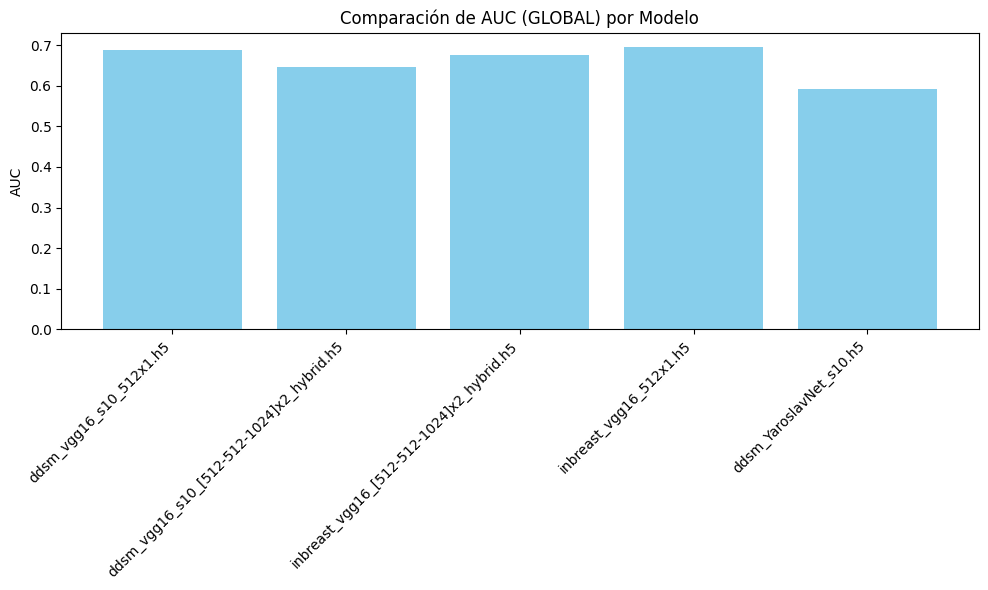

📊 Gráfica de AUC guardada en: RESULTS\auc_comparison.png


In [13]:
def main():
    summary_records = []

    for modelo in MODELOS:
        model_name = os.path.basename(modelo["ruta"])
        print(f"\n🚀 Probando modelo: {model_name} [{modelo['tipo']}]")

        try:
            all_dfs = []
            for data in DATASETS:
                print(f"🔄 Procesando {data['name']}...")

                # 1. Preprocesamiento
                preprocessed_folder = run_preprocess(data["pkl"], data["img_folder"], data["name"])
                if preprocessed_folder is None:
                    raise RuntimeError("Error en preprocesamiento")

                # 2. Inferencia
                df = run_predictions(modelo["ruta"], modelo["tipo"], data["pkl"], preprocessed_folder, data["name"])
                if df is None:
                    raise RuntimeError("Error en predicciones")

                # 3. Métricas
                acc, auc = compute_metrics(df)
                print(f"✅ {data['name']} -> Accuracy: {acc:.4f} | AUC: {auc:.4f}")

                all_dfs.append(df)

                # Guardar métricas dataset
                summary_records.append({
                    "Model": model_name,
                    "Dataset": data["name"],
                    "Accuracy": round(acc, 4),
                    "AUC": round(auc, 4)
                })

            # 4. Métricas globales
            combined = pd.concat(all_dfs, ignore_index=True)
            acc_global, auc_global = compute_metrics(combined)
            print(f"🎯 Global -> Accuracy: {acc_global:.4f} | AUC: {auc_global:.4f}")

            summary_records.append({
                "Model": model_name,
                "Dataset": "GLOBAL",
                "Accuracy": round(acc_global, 4),
                "AUC": round(auc_global, 4)
            })

        except Exception as e:
            print(f"⚠ Modelo {model_name} falló: {e}")
            continue

    # Guardar CSV resumen
    df_summary = pd.DataFrame(summary_records)
    df_summary.to_csv(SUMMARY_CSV, index=False)
    print(f"\n📂 Resumen de métricas guardado en: {SUMMARY_CSV}")

    # ================================
    # GRAFICAR AUC COMPARATIVO
    # ================================
    try:
        df_auc = df_summary[df_summary["Dataset"] == "GLOBAL"]
        plt.figure(figsize=(10, 6))
        plt.bar(df_auc["Model"], df_auc["AUC"], color="skyblue")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("AUC")
        plt.title("Comparación de AUC (GLOBAL) por Modelo")
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_DIR, "auc_comparison.png"))
        plt.show()
        print(f"📊 Gráfica de AUC guardada en: {os.path.join(RESULTS_DIR, 'auc_comparison.png')}")
    except Exception as e:
        print(f"⚠ Error generando gráfica: {e}")


if __name__ == "__main__":
    main()